In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
original_df1 = pd.read_csv('../input/wind_dataset_imputed1.csv')
df1 = original_df1.drop('DATE', axis='columns')
df1.head()

original_df2 = pd.read_csv('../input/wind_dataset_imputed2.csv')
df2 = original_df2.drop('DATE', axis='columns')
df2.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [3]:
train_df1, test_df1 = train_test_split(df1, test_size=0.3, shuffle=False)

train_df2, test_df2 = train_test_split(df2, test_size=0.3, shuffle=False)

In [4]:
X1_train = train_df1.drop('WIND', axis='columns')
y1_train = train_df1['WIND']
X1_test = test_df1.drop('WIND', axis='columns')
y1_test = test_df1['WIND']

X2_train = train_df2.drop('WIND', axis='columns')
y2_train = train_df2['WIND']
X2_test = test_df2.drop('WIND', axis='columns')
y2_test = test_df2['WIND']

In [5]:
model = XGBRegressor(eta=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1 = cross_val_score(model, df1.drop('WIND', axis="columns"), df1['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(scores1)
scores1 = absolute(scores1)
print('Mean MAE: %.3f (%.3f)' % (scores1.mean(), scores1.std()) )

scores2 = cross_val_score(model, df2.drop('WIND', axis="columns"), df2['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(scores2)
scores2 = absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

[-3.71317734 -3.71931037 -3.85315269 -3.97225129 -4.02230445 -3.78457586
 -3.5966937  -3.89216487 -3.83979333 -3.68932445 -3.89209625 -3.88333333
 -3.66553795 -3.8832588  -3.73036567 -3.73913125 -3.81332767 -3.91103093
 -3.92663291 -3.72821508 -3.93801657 -3.77755983 -3.72599248 -3.70578287
 -3.73911079 -3.80342602 -4.11006185 -3.79127993 -3.74223306 -3.71570471]
Mean MAE: 3.810 (0.113)
[-3.83865816 -3.84674584 -3.95663554 -3.96256817 -4.01885186 -3.89149371
 -3.7046568  -4.03666894 -3.83622046 -3.58089013 -3.9360109  -3.88253074
 -3.72943852 -3.9741076  -3.84100548 -3.83894005 -3.73672498 -4.05967831
 -3.99671072 -3.82930403 -3.84106342 -3.74672452 -3.78411006 -3.54712333
 -4.00854315 -4.0823585  -4.02150377 -3.89857632 -3.79476708 -3.71066005]
Mean MAE: 3.864 (0.133)


3.85


<AxesSubplot:xlabel='DATE'>

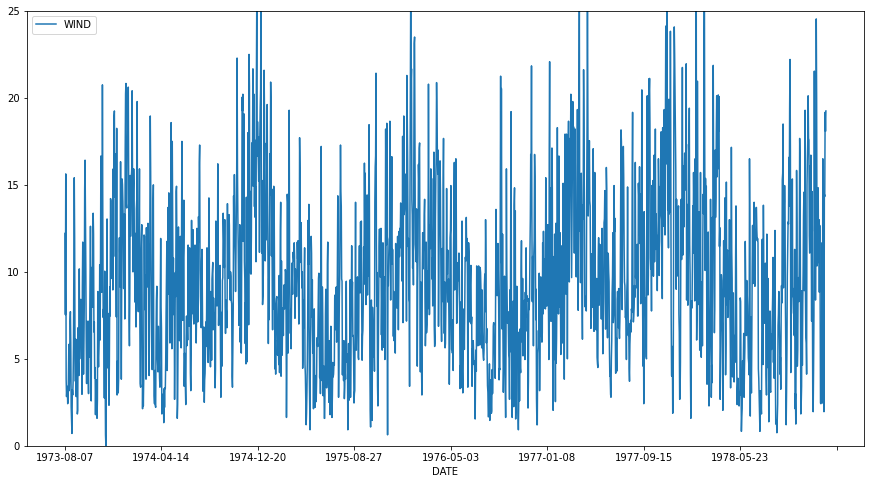

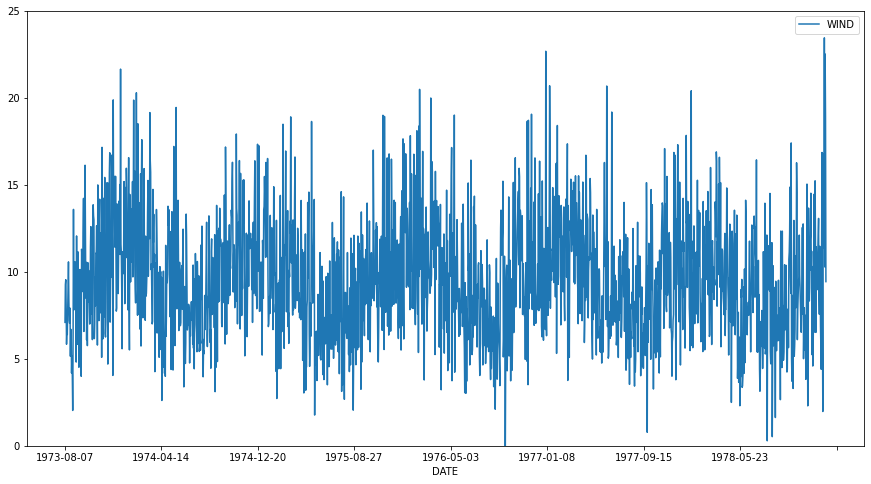

In [6]:
model.fit(X1_train, y1_train)

predicted_y1 = model.predict(X1_test)

print(round(mean_absolute_error(y1_test, predicted_y1), 2))

test_df1['DATE'] = original_df1['DATE']
test_df1 = test_df1.set_index('DATE')
test_df1.plot(y='WIND',figsize=(15,8), ylim=(0, 25))

predicted_y1_df1 = pd.DataFrame([list(x) for x in zip(test_df1.index.array, predicted_y1)], columns=['DATE', 'WIND'])
predicted_y1_df1 = predicted_y1_df1.set_index('DATE')
predicted_y1_df1.plot(y='WIND',figsize=(15,8), ylim=(0, 25))

3.85


<AxesSubplot:xlabel='DATE'>

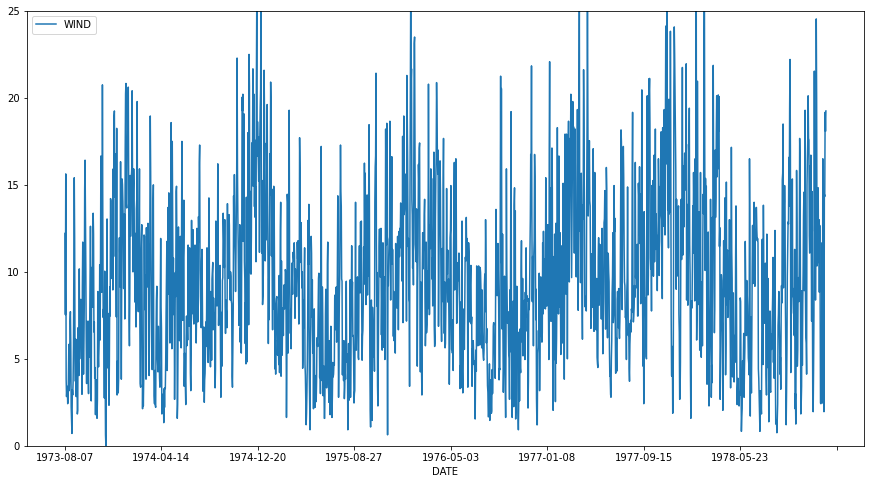

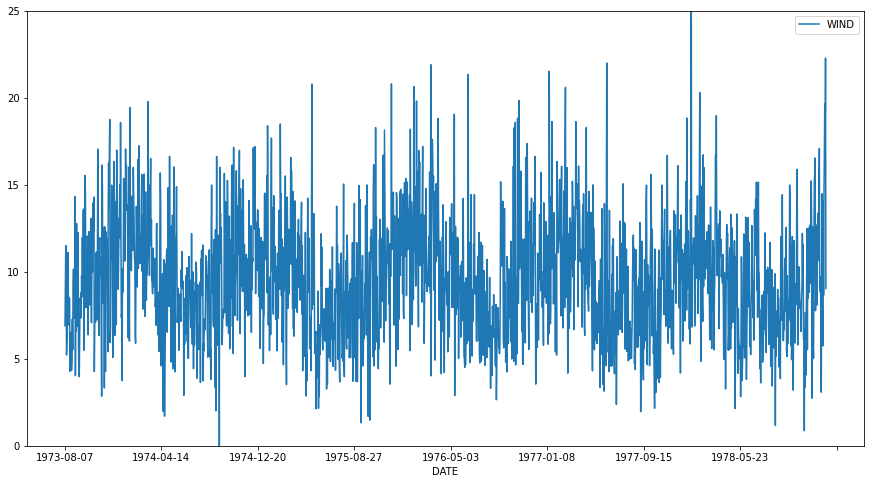

In [7]:
model.fit(X2_train, y2_train)

predicted_y2 = model.predict(X2_test)

print(round(mean_absolute_error(y1_test, predicted_y1), 2))

test_df2['DATE'] = original_df2['DATE']
test_df2 = test_df2.set_index('DATE')
test_df2.plot(y='WIND',figsize=(15,8), ylim=(0,25))

predicted_y2_df2 = pd.DataFrame([list(x) for x in zip(test_df2.index.array, predicted_y2)], columns=['DATE', 'WIND'])
predicted_y2_df2 = predicted_y2_df2.set_index('DATE')
predicted_y2_df2.plot(y='WIND',figsize=(15,8), ylim=(0,25))